# Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as  plt
import numpy as np

## Histogram

In [2]:
values = [0,4,2,3,5,2,4,4,3,4,3,6,7,5,4,3,5,7,4,9,8,7,6,7,5,6,7]

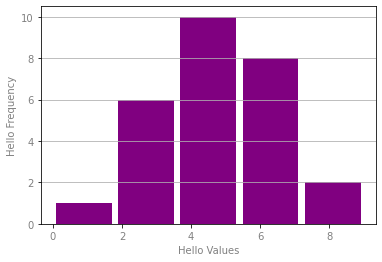

In [3]:
# You can use ; to remove stats of data
plt.hist(values, bins=5, rwidth=0.9, color='purple'); # use ShiftTab on historagm to view settings
plt.grid(axis='y') # axis=y omits the y axis
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.xlabel('Hello Values', color='grey')
plt.ylabel('Hello Frequency', color='grey');

## Lineplot

In [4]:
year = np.arange(2000, 2020)
population = [ 100000 + 800*np.random.normal(0,1) + x*1000 for x in np.arange(0,20)]

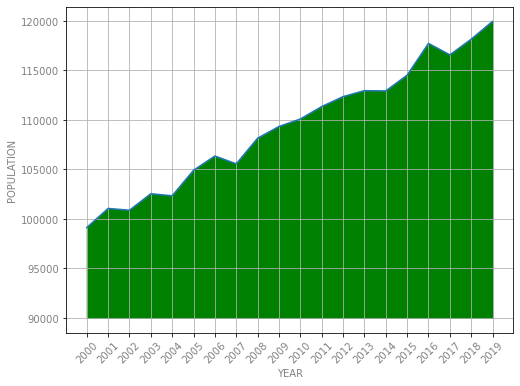

In [5]:
# Plotting random line plot
plt.figure(figsize = (8,6)) # Size of figure, figsize = (x,y)axis
plt.grid(axis='both')
plt.plot (year, population)
plt.xticks(year,rotation=45, color='grey')
plt.yticks(color='grey')
plt.xlabel('YEAR', color='grey')
plt.ylabel('POPULATION', color='grey')
plt.fill_between(year, population, 90000, color='green') # we set the limit as 90k
plt.show()

## Scatter Plot

In [6]:
height = [150, 160, 170, 180, 182, 189, 191]
weight = [50, 55, 56, 56, 64, 66, 70]

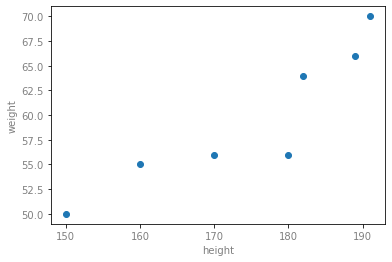

In [7]:
plt.scatter(height,weight)
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.xlabel('height', color='grey')
plt.ylabel('weight', color='grey');

## Bar Chart

In [8]:
categories = ['Python', 'Java', 'C', 'C++']
popularity = [100,90,60,80]

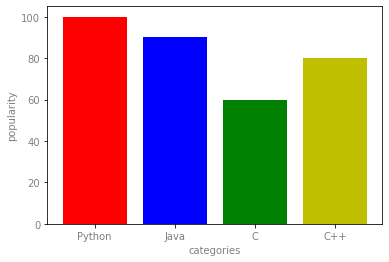

In [9]:
plt.bar(categories,popularity, color=['r','b','g','y'])
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.xlabel('categories', color='grey')
plt.ylabel('popularity', color='grey');

## Pie Chart

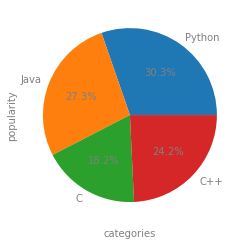

In [10]:
plt.pie(popularity, labels=categories, autopct='%.1f%%',textprops={'color':"grey"})
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.xlabel('categories', color='grey')
plt.ylabel('popularity', color='grey');

## Multiple Plots

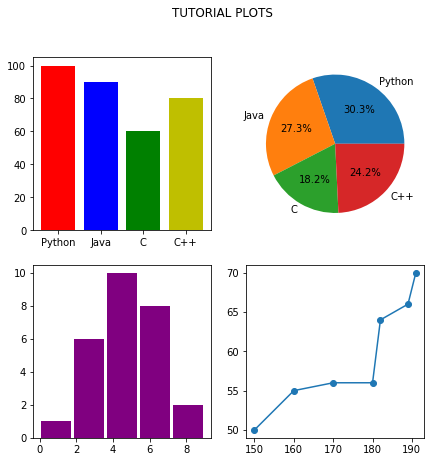

In [11]:
fig, ax = plt.subplots(2,2, figsize = (7,7))
ax[0,0].bar(categories,popularity, color=['r','b','g','y'])
ax[0,1].pie(popularity, labels=categories, autopct='%.1f%%')
ax[1,0].hist(values, bins=5, rwidth=0.9, color='purple')
ax[1,1].scatter(height,weight)
ax[1,1].plot(height,weight)

fig.suptitle("TUTORIAL PLOTS")
plt.show()

In [12]:
fig.savefig("fig.Plots.png")

## Some Pandas Features

In [13]:
df = pd.read_csv('marks.csv')
df.head()

,Student_ID,Student_Name,English,Maths,Science,History,Social_Studies
0,S01,Alice,96.874050,15.367999,58.682033,59.690510,61.373070
1,S02,Bob,5.462131,81.032680,83.171957,45.664012,80.805730
2,S03,Charlie,60.753099,65.219548,99.323628,24.281512,58.057612
3,S04,David,21.160844,95.052971,35.860852,62.865185,95.264572
4,S05,Edward,63.250994,60.693247,7.020915,60.505272,34.041671


In [14]:
# Load the data
# Set student id as the index
# use only columns student_id, student_name, english, and science
df = pd.read_csv('marks.csv', index_col=0, usecols=['Student_ID', 'Student_Name', 'English','Science'])

# Sort the list and Filter Name with letter A with TRUE OR FALSE
df['Has_Letter_A'] = df['Student_Name'].str.lower().str.contains('a') 
df['Has_Letter_A'] = df['Has_Letter_A'].map({True:'Female',False:'Male'})

# # Rename the Has_Letter_A to Gender column
df = df.rename({'Has_Letter_A':'Gender'}, axis=1)
df.head()

,Student_Name,English,Science,Gender
Student_ID,,,,
S01,Alice,96.874050,58.682033,Female
S02,Bob,5.462131,83.171957,Male
S03,Charlie,60.753099,99.323628,Female
S04,David,21.160844,35.860852,Female
S05,Edward,63.250994,7.020915,Female


In [15]:
# np.where
df['Score'] = (df['English'] + df['Science'])/2
df['Grade'] = np.where( df['Score']>80, 'A', np.where(df['Score']>60, 'B', np.where(df['Score']>40, 'C', 'D')))
df.head()

,Student_Name,English,Science,Gender,Score,Grade
Student_ID,,,,,,
S01,Alice,96.874050,58.682033,Female,77.778041,B
S02,Bob,5.462131,83.171957,Male,44.317044,C
S03,Charlie,60.753099,99.323628,Female,80.038363,A
S04,David,21.160844,35.860852,Female,28.510848,D
S05,Edward,63.250994,7.020915,Female,35.135954,D


In [16]:
# df.apply
def pass_fail_test(row):
    if row['Score'] <= 40:
        return 'fail'
    else:
        return 'PASS'
    


In [17]:
df['Pass_Fail'] = df.apply(pass_fail_test, axis=1)
df.head()

,Student_Name,English,Science,Gender,Score,Grade,Pass_Fail
Student_ID,,,,,,,
S01,Alice,96.874050,58.682033,Female,77.778041,B,PASS
S02,Bob,5.462131,83.171957,Male,44.317044,C,PASS
S03,Charlie,60.753099,99.323628,Female,80.038363,A,PASS
S04,David,21.160844,35.860852,Female,28.510848,D,fail
S05,Edward,63.250994,7.020915,Female,35.135954,D,fail


## Group by

In [18]:
# Count
df.groupby('Grade').size()

Grade
A     2
B     1
C     6
D    11
dtype: int64

In [19]:
df.groupby('Gender').size()

Gender
Female    11
Male       9
dtype: int64

In [20]:
df.groupby(['Grade', 'Gender']).size()

Grade  Gender
A      Female    2
B      Female    1
C      Female    2
       Male      4
D      Female    6
       Male      5
dtype: int64

In [21]:
df.groupby(['Grade']).mean()

,English,Science,Score
Grade,,,
A,78.340760,97.381896,87.861328
B,96.874050,58.682033,77.778041
C,42.233157,55.144404,48.688781
D,29.101881,20.582463,24.842172


In [22]:
g = df.groupby(['Grade','Gender']).agg(['min', 'max', 'mean'])
g

English                          Science             \
                    min        max       mean        min        max   
Grade Gender                                                          
A     Female  60.753099  95.928421  78.340760  95.440164  99.323628   
B     Female  96.874050  96.874050  96.874050  58.682033  58.682033   
C     Female   5.777530  30.830802  18.304166  84.271650  94.559212   
      Male     5.462131  72.833673  54.197652  14.219533  83.171957   
D     Female   5.302984  63.250994  26.449213   2.618987  43.980951   
      Male     5.982402  43.559963  32.285082   3.312853  40.977224   

                             Score                        
                   mean        min        max       mean  
Grade Gender                                              
A     Female  97.381896  80.038363  95.684293  87.861328  
B     Female  58.682033  77.778041  77.778041  77.778041  
C     Female  89.415431  50.168371  57.551226  53.859798  
      Male    38.008891  40.248080  52.386620  46.103272  
D     Female  23.869411  10.344626  39.955681  25.159312  
      Male    16.638127  17.140792  28.742247  24.461604

In [23]:
# .stack --> This will make dataframe longer (Column to row)
g.stack()

English    Science      Score
Grade Gender                                      
A     Female min   60.753099  95.440164  80.038363
             max   95.928421  99.323628  95.684293
             mean  78.340760  97.381896  87.861328
B     Female min   96.874050  58.682033  77.778041
             max   96.874050  58.682033  77.778041
             mean  96.874050  58.682033  77.778041
C     Female min    5.777530  84.271650  50.168371
             max   30.830802  94.559212  57.551226
             mean  18.304166  89.415431  53.859798
      Male   min    5.462131  14.219533  40.248080
             max   72.833673  83.171957  52.386620
             mean  54.197652  38.008891  46.103272
D     Female min    5.302984   2.618987  10.344626
             max   63.250994  43.980951  39.955681
             mean  26.449213  23.869411  25.159312
      Male   min    5.982402   3.312853  17.140792
             max   43.559963  40.977224  28.742247
             mean  32.285082  16.638127  24.461604

In [24]:
# unstack --> This will make dataframe wider (Row to column)
g.unstack('Grade')

English                                                     \
              min                                      max             
Grade           A         B         C         D          A         B   
Gender                                                                 
Female  60.753099  96.87405  5.777530  5.302984  95.928421  96.87405   
Male          NaN       NaN  5.462131  5.982402        NaN       NaN   

                                                  ...      Score             \
                                  mean            ...        min              
Grade           C          D         A         B  ...          C          D   
Gender                                            ...                         
Female  30.830802  63.250994  78.34076  96.87405  ...  50.168371  10.344626   
Male    72.833673  43.559963       NaN       NaN  ...  40.248080  17.140792   

                                                                          \
              max                                        mean              
Grade           A          B          C          D          A          B   
Gender                                                                     
Female  95.684293  77.778041  57.551226  39.955681  87.861328  77.778041   
Male          NaN        NaN  52.386620  28.742247        NaN        NaN   

                              
                              
Grade           C          D  
Gender                        
Female  53.859798  25.159312  
Male    46.103272  24.461604  

[2 rows x 36 columns]

## Pivot and Pivot Table

In [25]:
# Make sure index has no duplicate
df.pivot(columns = 'Grade', values='Grade').count()

Grade
A     2
B     1
C     6
D    11
dtype: int64

In [26]:
# Using Pivot_Table
df.pivot_table(index=['Grade','Gender'], values=['English','Science','Score'],aggfunc=['min','max','mean'])

min                              max             \
                English    Science      Score    English    Science   
Grade Gender                                                          
A     Female  60.753099  95.440164  80.038363  95.928421  99.323628   
B     Female  96.874050  58.682033  77.778041  96.874050  58.682033   
C     Female   5.777530  84.271650  50.168371  30.830802  94.559212   
      Male     5.462131  14.219533  40.248080  72.833673  83.171957   
D     Female   5.302984   2.618987  10.344626  63.250994  43.980951   
      Male     5.982402   3.312853  17.140792  43.559963  40.977224   

                              mean                        
                  Score    English    Science      Score  
Grade Gender                                              
A     Female  95.684293  78.340760  97.381896  87.861328  
B     Female  77.778041  96.874050  58.682033  77.778041  
C     Female  57.551226  18.304166  89.415431  53.859798  
      Male    52.386620  54.197652  38.008891  46.103272  
D     Female  39.955681  26.449213  23.869411  25.159312  
      Male    28.742247  32.285082  16.638127  24.461604

## Crosstab

In [27]:
# count
df.groupby('Grade').size()

Grade
A     2
B     1
C     6
D    11
dtype: int64

In [28]:
# This is series
df['Grade'].value_counts().sort_index()

A     2
B     1
C     6
D    11
Name: Grade, dtype: int64

In [29]:
df.head()

,Student_Name,English,Science,Gender,Score,Grade,Pass_Fail
Student_ID,,,,,,,
S01,Alice,96.874050,58.682033,Female,77.778041,B,PASS
S02,Bob,5.462131,83.171957,Male,44.317044,C,PASS
S03,Charlie,60.753099,99.323628,Female,80.038363,A,PASS
S04,David,21.160844,35.860852,Female,28.510848,D,fail
S05,Edward,63.250994,7.020915,Female,35.135954,D,fail


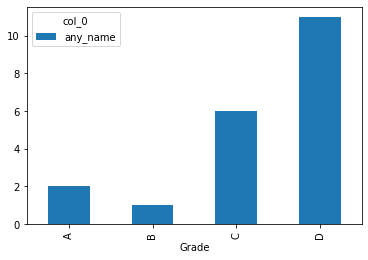

In [30]:
# This is dataframe
# INDEX will count the 'Grade'and group by (a, b, c, d) and put into columns with a random name

pd.crosstab(index=df['Grade'], columns='any_name').plot.bar();

In [31]:
# index 'Grade' and compare with 'Gender' while showing only the 'Score' data using 'Count' as aggfunc

df.pivot_table(index='Grade', columns=['Gender'], values='Score', fill_value=0, aggfunc='count').astype(int)

Gender,Female,Male
Grade,,
A,2,0
B,1,0
C,2,4
D,6,5


## Pandas visualization

In [32]:
df.head()

,Student_Name,English,Science,Gender,Score,Grade,Pass_Fail
Student_ID,,,,,,,
S01,Alice,96.874050,58.682033,Female,77.778041,B,PASS
S02,Bob,5.462131,83.171957,Male,44.317044,C,PASS
S03,Charlie,60.753099,99.323628,Female,80.038363,A,PASS
S04,David,21.160844,35.860852,Female,28.510848,D,fail
S05,Edward,63.250994,7.020915,Female,35.135954,D,fail


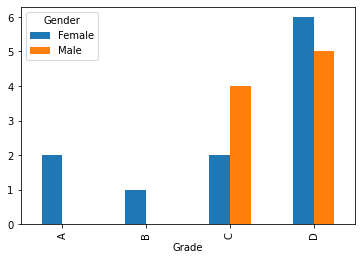

In [33]:
c = pd.crosstab(index=df['Grade'], columns=df['Gender'])
c.plot.bar();

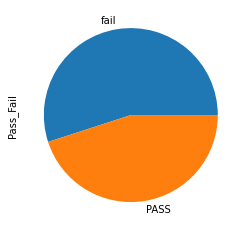

In [34]:
df['Pass_Fail'].value_counts().plot.pie();

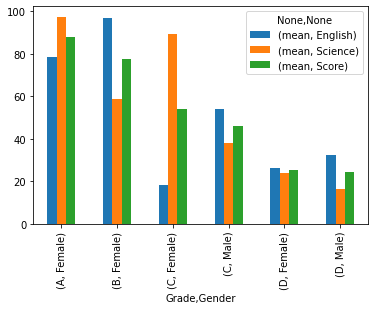

In [35]:
# Using the data of (x-axis : 'Grade' and 'Gender'), print the values of (y-axis : 'English', 'Science' and 'Score') 
# in a bar chart.

df.pivot_table(index=['Grade','Gender'], values=['English','Science','Score'],aggfunc=['mean']).plot.bar();

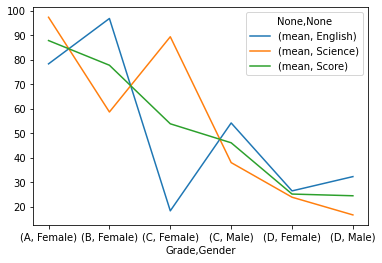

In [36]:
df.pivot_table(index=['Grade','Gender'], values=['English','Science','Score'],aggfunc=['mean']).plot.line();